In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

from qemlib import EstimatorExecutor
from qemlib.pt import PauliTwirler, twirl_circuit

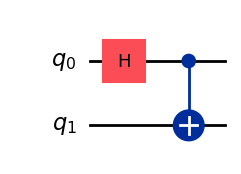

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [3]:
observable = SparsePauliOp.from_list([("ZZ", 1.0)])
print(observable)

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


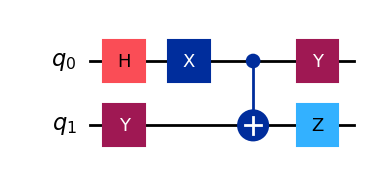

In [6]:
twirl_circuit(qc).draw(output='mpl')


In [7]:
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ["h"])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ["cx"])

backend = AerSimulator(noise_model=noise_model)

In [8]:
executor = EstimatorExecutor(backend=backend, observable=observable, shots=50_000)

In [9]:
pt = PauliTwirler(shots=30, seed=42)

result = pt.run(qc, executor)

print("PT value:", result["mean"])


PT value: 0.9034053333333333
